In [1]:
## CPTS570 Homework1 Ricardo Rivero - Binary classification

## Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#We will obtain the fashion_mnist dataset as implemented in Keras Datasets
from keras._tf_keras.keras.datasets import fashion_mnist
import random

In [11]:
def binary_classification(y):
    y_update = []
    for y in y:
        if y%2 == 0:
            y_update.append(1)
        else:
            y_update.append(-1)
    return y_update

def learning_rate(weight, x, y):
    return(1-y*np.dot(weight, x) / np.square(np.linalg.norm(x)))

In [4]:
#Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Iteration 1 /50
Iteration 2 /50
Iteration 3 /50
Iteration 4 /50
Iteration 5 /50
Iteration 6 /50
Iteration 7 /50
Iteration 8 /50
Iteration 9 /50
Iteration 10 /50
Iteration 11 /50
Iteration 12 /50
Iteration 13 /50
Iteration 14 /50
Iteration 15 /50
Iteration 16 /50
Iteration 17 /50
Iteration 18 /50
Iteration 19 /50
Iteration 20 /50
Iteration 21 /50
Iteration 22 /50
Iteration 23 /50
Iteration 24 /50
Iteration 25 /50
Iteration 26 /50
Iteration 27 /50
Iteration 28 /50
Iteration 29 /50
Iteration 30 /50
Iteration 31 /50
Iteration 32 /50
Iteration 33 /50
Iteration 34 /50
Iteration 35 /50
Iteration 36 /50
Iteration 37 /50
Iteration 38 /50
Iteration 39 /50
Iteration 40 /50
Iteration 41 /50
Iteration 42 /50
Iteration 43 /50
Iteration 44 /50
Iteration 45 /50
Iteration 46 /50
Iteration 47 /50
Iteration 48 /50
Iteration 49 /50
Iteration 50 /50


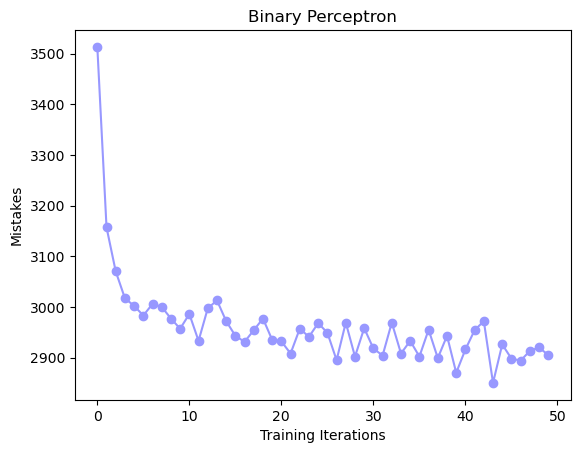

In [20]:
#Standard Perceptron
weight = np.zeros(784)
y_train_class = binary_classification(y_train)
y_test_class = binary_classification(y_test)
x_result = []

for i in range(50):
    mistakes = 0
    for j in range(len(x_train)):
        new_x = x_train[j].flatten()
        y = np.sign(np.dot(weight, new_x))
        if y == 0:
            y = 1  # Handle zero case if needed
        if y != y_train_class[j]:
            weight += y_train_class[j] * new_x
            mistakes += 1
    print('Iteration', i+1, '/50')
    x_result.append(mistakes)

plt.title("Binary Perceptron")
plt.xlabel('Training Iterations')
plt.ylabel('Mistakes')
plt.plot([i for i in range(50)], x_result, color='#9898FF', marker='o')
plt.savefig('Binary_Perceptron_Mistakes.png', dpi=300)
plt.show()


Iteration 1 /50
Iteration 2 /50
Iteration 3 /50
Iteration 4 /50
Iteration 5 /50
Iteration 6 /50
Iteration 7 /50
Iteration 8 /50
Iteration 9 /50
Iteration 10 /50
Iteration 11 /50
Iteration 12 /50
Iteration 13 /50
Iteration 14 /50
Iteration 15 /50
Iteration 16 /50
Iteration 17 /50
Iteration 18 /50
Iteration 19 /50
Iteration 20 /50
Iteration 21 /50
Iteration 22 /50
Iteration 23 /50
Iteration 24 /50
Iteration 25 /50
Iteration 26 /50
Iteration 27 /50
Iteration 28 /50
Iteration 29 /50
Iteration 30 /50
Iteration 31 /50
Iteration 32 /50
Iteration 33 /50
Iteration 34 /50
Iteration 35 /50
Iteration 36 /50
Iteration 37 /50
Iteration 38 /50
Iteration 39 /50
Iteration 40 /50
Iteration 41 /50
Iteration 42 /50
Iteration 43 /50
Iteration 44 /50
Iteration 45 /50
Iteration 46 /50
Iteration 47 /50
Iteration 48 /50
Iteration 49 /50
Iteration 50 /50


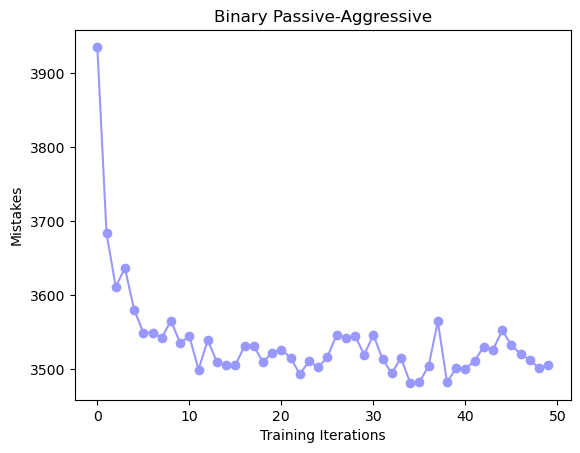

In [19]:
#Standard Perceptron
weight = np.zeros(784)
y_train_class = binary_classification(y_train)
y_test_class = binary_classification(y_test)
x_result = []

for i in range(50):
    mistakes = 0
    for j in range(len(x_train)):
        new_x = x_train[j].flatten()
        y = np.sign(np.dot(weight, new_x))
        if y == 0:
            y = 1  # Handle zero case if needed
        if y != y_train_class[j]:
            weight = weight + learning_rate(weight, new_x, y_train_class[j]) * np.dot(new_x, y_train_class[j])
            mistakes += 1
    print('Iteration', i+1, '/50')
    x_result.append(mistakes)

plt.title("Binary Passive-Aggressive")
plt.xlabel('Training Iterations')
plt.ylabel('Mistakes')
plt.plot([i for i in range(50)], x_result, color='#9898FF', marker='o')
plt.savefig('Binary_PA_Mistakes.png', dpi=300)
plt.show()

Iteration 1/50 - Training Accuracy: 0.9415, Testing Accuracy: 0.9368
Iteration 2/50 - Training Accuracy: 0.9474, Testing Accuracy: 0.9438
Iteration 3/50 - Training Accuracy: 0.9488, Testing Accuracy: 0.9466
Iteration 4/50 - Training Accuracy: 0.9497, Testing Accuracy: 0.9501
Iteration 5/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9572
Iteration 6/50 - Training Accuracy: 0.9503, Testing Accuracy: 0.9535
Iteration 7/50 - Training Accuracy: 0.9499, Testing Accuracy: 0.9375
Iteration 8/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9551
Iteration 9/50 - Training Accuracy: 0.9504, Testing Accuracy: 0.9520
Iteration 10/50 - Training Accuracy: 0.9507, Testing Accuracy: 0.9432
Iteration 11/50 - Training Accuracy: 0.9502, Testing Accuracy: 0.9428
Iteration 12/50 - Training Accuracy: 0.9511, Testing Accuracy: 0.9480
Iteration 13/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9512
Iteration 14/50 - Training Accuracy: 0.9498, Testing Accuracy: 0.9542
Iteration 15/50 - Training Ac

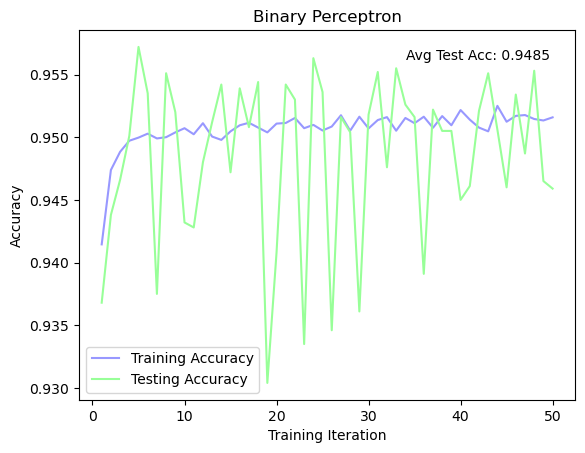

In [27]:
#Accuracy on the training and testing sets - Standard Perceptron
#Initialize the weights
weight = np.zeros(784)

y_train_class = binary_classification(y_train)
y_test_class = binary_classification(y_test)

x_train_accuracy = []
x_test_accuracy = []


for i in range(50):
    #Training
    correct_train = 0
    for j in range(len(x_train)):
        new_x = x_train[j].flatten()
        y = np.sign(np.dot(weight, new_x))
        if y == 0:
            y = 1  
        if y != y_train_class[j]:
            weight += np.dot(y_train_class[j],new_x)
        else:
            correct_train += 1
    train_accuracy = correct_train / len(x_train)
    x_train_accuracy.append(train_accuracy)

    #Test
    correct_test = 0
    for j in range(len(x_test)):
        new_x = x_test[j].flatten()
        y = np.sign(np.dot(weight, new_x))
        if y == 0:
            y = 1  
        if y == y_test_class[j]:
            correct_test += 1
    test_accuracy = correct_test / len(x_test)
    x_test_accuracy.append(test_accuracy)
    print(f'Iteration {i+1}/50 - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

average_test_accuracy = np.mean(x_test_accuracy)

# Plotting the results
plt.title("Binary Perceptron")
plt.xlabel('Training Iteration')
plt.ylabel('Accuracy')
plt.plot(range(1, 51), x_train_accuracy, label='Training Accuracy', color='#9898FF')
plt.plot(range(1, 51), x_test_accuracy, label='Testing Accuracy', color='#98FF98')
# Add annotation for average test accuracy
plt.text(0.95, 0.95, f'Avg Test Acc: {average_test_accuracy:.4f}',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes)

plt.legend()
plt.savefig('Binary_Perceptron_Accuracy.png', dpi=300)
plt.show()


Iteration 1/50 - Training Accuracy: 0.9344, Testing Accuracy: 0.9544
Iteration 2/50 - Training Accuracy: 0.9386, Testing Accuracy: 0.9478
Iteration 3/50 - Training Accuracy: 0.9398, Testing Accuracy: 0.9453
Iteration 4/50 - Training Accuracy: 0.9394, Testing Accuracy: 0.9507
Iteration 5/50 - Training Accuracy: 0.9403, Testing Accuracy: 0.9513
Iteration 6/50 - Training Accuracy: 0.9408, Testing Accuracy: 0.9513
Iteration 7/50 - Training Accuracy: 0.9408, Testing Accuracy: 0.9487
Iteration 8/50 - Training Accuracy: 0.9410, Testing Accuracy: 0.9494
Iteration 9/50 - Training Accuracy: 0.9406, Testing Accuracy: 0.9483
Iteration 10/50 - Training Accuracy: 0.9411, Testing Accuracy: 0.9500
Iteration 11/50 - Training Accuracy: 0.9409, Testing Accuracy: 0.9476
Iteration 12/50 - Training Accuracy: 0.9417, Testing Accuracy: 0.9457
Iteration 13/50 - Training Accuracy: 0.9410, Testing Accuracy: 0.9534
Iteration 14/50 - Training Accuracy: 0.9415, Testing Accuracy: 0.9524
Iteration 15/50 - Training Ac

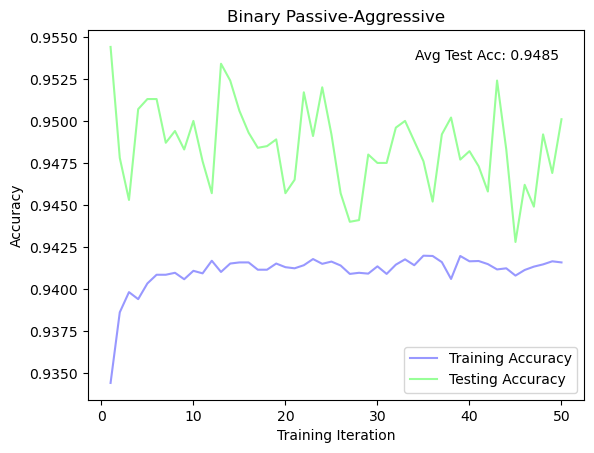

In [28]:
#Accuracy on the training and testing sets - Passive-Aggressive
#Initialize the weights
weight = np.zeros(784)

y_train_class = binary_classification(y_train)
y_test_class = binary_classification(y_test)

x_train_accuracy = []
x_test_accuracy = []


for i in range(50):
    #Training
    correct_train = 0
    for j in range(len(x_train)):
        new_x = x_train[j].flatten()
        y = np.sign(np.dot(weight, new_x))
        if y == 0:
            y = 1  
        if y != y_train_class[j]:
            weight = weight + learning_rate(weight, new_x, y_train_class[j]) * np.dot(new_x, y_train_class[j])
        else:
            correct_train += 1
    train_accuracy = correct_train / len(x_train)
    x_train_accuracy.append(train_accuracy)

    #Test
    correct_test = 0
    for j in range(len(x_test)):
        new_x = x_test[j].flatten()
        y = np.sign(np.dot(weight, new_x))
        if y == y_test_class[j]:
            correct_test += 1
    test_accuracy = correct_test / len(x_test)
    x_test_accuracy.append(test_accuracy)
    print(f'Iteration {i+1}/50 - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

average_test_accuracy = np.mean(x_test_accuracy)

# Plotting the results
plt.title("Binary Passive-Aggressive")
plt.xlabel('Training Iteration')
plt.ylabel('Accuracy')
plt.plot(range(1, 51), x_train_accuracy, label='Training Accuracy', color='#9898FF')
plt.plot(range(1, 51), x_test_accuracy, label='Testing Accuracy', color='#98FF98')
# Add annotation for average test accuracy
plt.text(0.95, 0.95, f'Avg Test Acc: {average_test_accuracy:.4f}',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes)

plt.legend()
plt.savefig('Binary_PA_Accuracy.png', dpi=300)
plt.show()


Iteration 1/50 - Training Accuracy: 0.9415, Testing Accuracy: 0.9606
Iteration 2/50 - Training Accuracy: 0.9474, Testing Accuracy: 0.9619
Iteration 3/50 - Training Accuracy: 0.9488, Testing Accuracy: 0.9619
Iteration 4/50 - Training Accuracy: 0.9497, Testing Accuracy: 0.9617
Iteration 5/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9617
Iteration 6/50 - Training Accuracy: 0.9503, Testing Accuracy: 0.9615
Iteration 7/50 - Training Accuracy: 0.9499, Testing Accuracy: 0.9612
Iteration 8/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9614
Iteration 9/50 - Training Accuracy: 0.9504, Testing Accuracy: 0.9609
Iteration 10/50 - Training Accuracy: 0.9507, Testing Accuracy: 0.9612
Iteration 11/50 - Training Accuracy: 0.9502, Testing Accuracy: 0.9614
Iteration 12/50 - Training Accuracy: 0.9511, Testing Accuracy: 0.9612
Iteration 13/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9613
Iteration 14/50 - Training Accuracy: 0.9498, Testing Accuracy: 0.9613
Iteration 15/50 - Training Ac

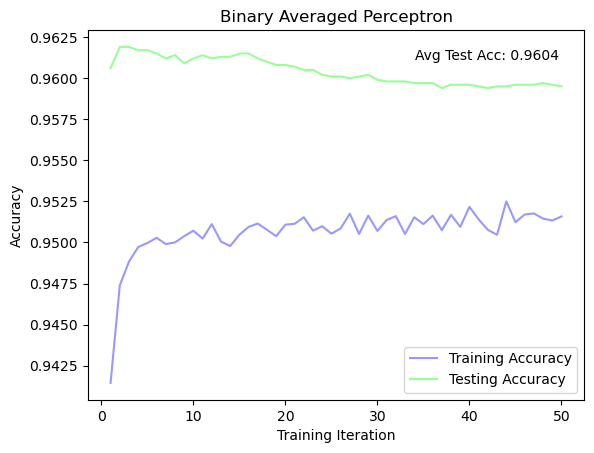

In [29]:
#Accuracy on the training and testing sets - Averaged Perceptron
#Initialize the weights
weight = np.zeros(784)
cumulative_weight = np.zeros(784)

y_train_class = binary_classification(y_train)
y_test_class = binary_classification(y_test)

x_train_accuracy = []
x_test_accuracy = []


for i in range(50):
    #Training
    correct_train = 0
    total_updates = 0
    for j in range(len(x_train)):
        new_x = x_train[j].flatten()
        y = np.sign(np.dot(weight, new_x))
        if y != y_train_class[j]:
            weight += np.dot(y_train_class[j],new_x)
            cumulative_weight = weight + cumulative_weight
            total_updates += 1
        else:
            correct_train += 1
    train_accuracy = correct_train / len(x_train)
    x_train_accuracy.append(train_accuracy)
    average_weight_epoch = cumulative_weight / total_updates

    #Test
    correct_test = 0
    for j in range(len(x_test)):
        new_x = x_test[j].flatten()
        y = np.sign(np.dot(average_weight_epoch, new_x))
        if y == 0:
            y = 1  
        if y == y_test_class[j]:
            correct_test += 1
    test_accuracy = correct_test / len(x_test)
    x_test_accuracy.append(test_accuracy)
    print(f'Iteration {i+1}/50 - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

average_test_accuracy = np.mean(x_test_accuracy)

# Plotting the results
plt.title("Binary Averaged Perceptron")
plt.xlabel('Training Iteration')
plt.ylabel('Accuracy')
plt.plot(range(1, 51), x_train_accuracy, label='Training Accuracy', color='#9898FF')
plt.plot(range(1, 51), x_test_accuracy, label='Testing Accuracy', color='#98FF98')
# Add annotation for average test accuracy
plt.text(0.95, 0.95, f'Avg Test Acc: {average_test_accuracy:.4f}',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes)

plt.legend()
plt.savefig('Binary_Averaged_Perceptron_Accuracy.png', dpi=300)
plt.show()


Iteration 50/50 - Training Accuracy: 0.9415, Testing Accuracy: 0.9368
Iteration 50/50 - Training Accuracy: 0.9474, Testing Accuracy: 0.9438
Iteration 50/50 - Training Accuracy: 0.9488, Testing Accuracy: 0.9466
Iteration 50/50 - Training Accuracy: 0.9497, Testing Accuracy: 0.9501
Iteration 50/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9572
Iteration 50/50 - Training Accuracy: 0.9503, Testing Accuracy: 0.9535
Iteration 50/50 - Training Accuracy: 0.9499, Testing Accuracy: 0.9375
Iteration 50/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9551
Iteration 50/50 - Training Accuracy: 0.9504, Testing Accuracy: 0.9520
Iteration 50/50 - Training Accuracy: 0.9507, Testing Accuracy: 0.9432
Iteration 50/50 - Training Accuracy: 0.9502, Testing Accuracy: 0.9428
Iteration 50/50 - Training Accuracy: 0.9511, Testing Accuracy: 0.9480
Iteration 50/50 - Training Accuracy: 0.9500, Testing Accuracy: 0.9512
Iteration 50/50 - Training Accuracy: 0.9498, Testing Accuracy: 0.9542
Iteration 50/50 - Tr

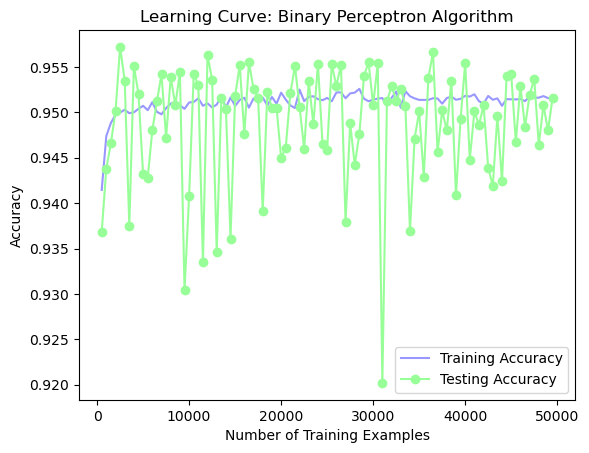

In [33]:
# Learning curve Standard Perceptron
weight = np.zeros(784)

y_train_class = binary_classification(y_train)
y_test_class = binary_classification(y_test)

x_train_accuracy = []
x_test_accuracy = []

row_range = range(500, 50000, 500)

# Assuming x_train and y_train are the full training datasets
original_x_train = x_train  # Keep a reference to the original data
original_y_train = y_train

for rows in row_range:
        correct_train = 0
        for j in range(len(x_train)):
                new_x = x_train[j].flatten()
                y = np.sign(np.dot(weight, new_x))
                if y == 0:
                        y = 1  
                if y != y_train_class[j]:
                        weight += np.dot(y_train_class[j],new_x)
                else:
                        correct_train += 1
        train_accuracy = correct_train / len(x_train)
        x_train_accuracy.append(train_accuracy)

        #Test
        correct_test = 0
        for j in range(len(x_test)):
                new_x = x_test[j].flatten()
                y = np.sign(np.dot(weight, new_x))
                if y == 0:
                        y = 1  
                if y == y_test_class[j]:
                        correct_test += 1
        test_accuracy = correct_test / len(x_test)
        x_test_accuracy.append(test_accuracy)
        print(f'Iteration {i+1}/50 - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

# Plotting the learning curve
plt.plot(row_range, x_train_accuracy, color='#9898FF', linestyle='solid', label='Training Accuracy')
plt.plot(row_range, x_test_accuracy, color='#98FF98', marker='o', linestyle='solid', label='Testing Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Binary Perceptron Algorithm")
plt.savefig('Binary_Perceptron_Learning_Curve.png', dpi=300)
plt.show()

Iteration 50/50 - Training Accuracy: 0.9344, Testing Accuracy: 0.9544
Iteration 50/50 - Training Accuracy: 0.9386, Testing Accuracy: 0.9478
Iteration 50/50 - Training Accuracy: 0.9398, Testing Accuracy: 0.9453
Iteration 50/50 - Training Accuracy: 0.9394, Testing Accuracy: 0.9507
Iteration 50/50 - Training Accuracy: 0.9403, Testing Accuracy: 0.9513
Iteration 50/50 - Training Accuracy: 0.9408, Testing Accuracy: 0.9513
Iteration 50/50 - Training Accuracy: 0.9408, Testing Accuracy: 0.9487
Iteration 50/50 - Training Accuracy: 0.9410, Testing Accuracy: 0.9494
Iteration 50/50 - Training Accuracy: 0.9406, Testing Accuracy: 0.9483
Iteration 50/50 - Training Accuracy: 0.9411, Testing Accuracy: 0.9500
Iteration 50/50 - Training Accuracy: 0.9409, Testing Accuracy: 0.9476
Iteration 50/50 - Training Accuracy: 0.9417, Testing Accuracy: 0.9457
Iteration 50/50 - Training Accuracy: 0.9410, Testing Accuracy: 0.9534
Iteration 50/50 - Training Accuracy: 0.9415, Testing Accuracy: 0.9524
Iteration 50/50 - Tr

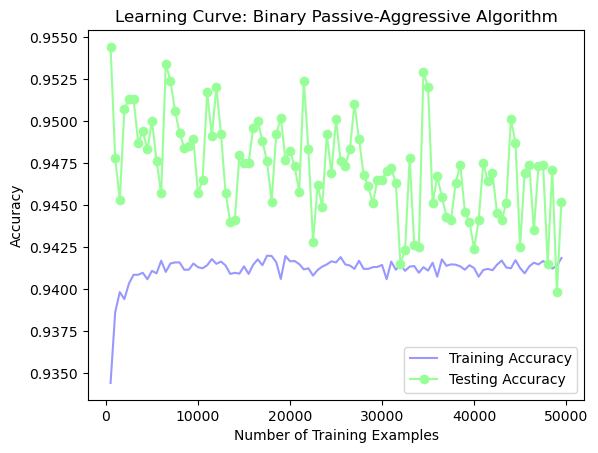

In [32]:
# Learning curve Passive-Aggressive
weight = np.zeros(784)

y_train_class = binary_classification(y_train)
y_test_class = binary_classification(y_test)

x_train_accuracy = []
x_test_accuracy = []

row_range = range(500, 50000, 500)

# Assuming x_train and y_train are the full training datasets
original_x_train = x_train  # Keep a reference to the original data
original_y_train = y_train

for rows in row_range:
        correct_train = 0
        for j in range(len(x_train)):
            new_x = x_train[j].flatten()
            y = np.sign(np.dot(weight, new_x))
            if y == 0:
                y = 1  
            if y != y_train_class[j]:
                weight = weight + learning_rate(weight, new_x, y_train_class[j]) * np.dot(new_x, y_train_class[j])
            else:
                correct_train += 1
        train_accuracy = correct_train / len(x_train)
        x_train_accuracy.append(train_accuracy)

    #Test
        correct_test = 0
        for j in range(len(x_test)):
            new_x = x_test[j].flatten()
            y = np.sign(np.dot(weight, new_x))
            if y == y_test_class[j]:
                correct_test += 1
        test_accuracy = correct_test / len(x_test)
        x_test_accuracy.append(test_accuracy)
        print(f'Iteration {i+1}/50 - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}')

# Plotting the learning curve
plt.plot(row_range, x_train_accuracy, color='#9898FF', linestyle='solid', label='Training Accuracy')
plt.plot(row_range, x_test_accuracy, color='#98FF98', marker='o', linestyle='solid', label='Testing Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Binary Passive-Aggressive Algorithm")
plt.savefig('Binary_Perceptron_Learning_Curve.png', dpi=300)
plt.show()